In [1]:
import numpy as np # arrays and slicing 
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # import for plotinng
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # import for plotting and implementing Hierarchical clustering
from sklearn.cluster import KMeans # import for implementing kmeans
from sklearn.preprocessing import StandardScaler # for normalization

In [2]:
df = pd.read_excel('Online Retail.xlsx') # read excel

In [3]:
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.shape # shape of data

(541909, 8)

In [5]:
df.info() # info of data see types of columns and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.dtypes # see types of column

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df.drop_duplicates(inplace=True) # drop identical rows

In [8]:
df.shape # see shape of data after dropping 

(536641, 8)

In [9]:
df.describe() # describe the quantiles for numerical columns

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.isna().sum() # see number of nulls in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df['Description'].fillna(value='No Description',inplace=True) # fill the Na in description with no description to not be null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
df.dropna(inplace=True) # drop nulls because without customer id we donot need the row
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.shape #shape of data

(401604, 8)

In [14]:
df.describe() # describe the quantiles for numerical columns

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df.drop(df[df['Quantity']<=0].index,inplace=True)
# drop rows how has quantity with =0 or under zero 
# it doesnot make sense negative quantity 
# zero quantity will be needed in clustering


In [16]:
grouped = df.groupby('StockCode') 
df['UnitPrice'] = grouped['UnitPrice'].apply(lambda x: x.replace(0, x.max())) 
# group by stockcode 
# to replace the the unitprice = 0 with its actual price by using stockcode

In [17]:
df.shape #shape of data

(392732, 8)

In [18]:
df[df['UnitPrice']==0] # check if there unitprice =0 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
df.describe() # describe the quantiles for numerical columns

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.189658,15287.734822
std,181.588420,27.545852,1713.567773
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


I read in the domian and found out to group customers to clusters will be based on RFM 
which is 
Recency : the last time the customer made a purchase ,
Frequency : the number of times a customer made a purchase ,
Monetary value : the amount money a customer paid 

In [44]:
df['Money paid'] = df['Quantity']*df['UnitPrice'] 
# make new column caleed amount to see the total money spended from customer in each purchase
newdf = df.groupby('CustomerID')['Money paid'].sum()
# sum the total money of each customer in all his purchases
newdf = newdf.reset_index() # reset index
newdf

,CustomerID,Money paid
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [45]:
data = df.groupby('CustomerID')['InvoiceNo'].nunique() # get the number of time each customer made a purchase
data = data.reset_index() # reset index
data.columns = ['CustomerID', 'Number of purchase'] 
data

,CustomerID,Number of purchase
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


In [46]:
newdf = pd.merge(newdf, data, on='CustomerID', how='inner') # merge the two dataframes with each other
newdf

,CustomerID,Money paid,Number of purchase
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4334,18280.0,180.60,1
4335,18281.0,80.82,1
4336,18282.0,178.05,2
4337,18283.0,2045.53,16


In [47]:
newdf.describe() # describe the quantiles for numerical columns

,CustomerID,Money paid,Number of purchase
count,4339.000000,4339.000000,4339.000000
mean,15299.936852,2057.578992,4.271952
std,1721.889758,9008.387450,7.705493
min,12346.000000,3.750000,1.000000
25%,13812.500000,306.720000,1.000000
50%,15299.000000,671.690000,2.000000
75%,16778.500000,1661.860000,5.000000
max,18287.000000,281327.780000,210.000000


In [48]:
newdf.reset_index().drop('index',axis=1) # reset index and drop column index because it is useless

,CustomerID,Money paid,Number of purchase
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1
...,...,...,...
4334,18280.0,180.60,1
4335,18281.0,80.82,1
4336,18282.0,178.05,2
4337,18283.0,2045.53,16


In [49]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
# convert the InvoiceDate column to date time format days-month-year 24 hours format

In [50]:
max_date = max(df['InvoiceDate'])
max_date 
# get the most recent date recorded

Timestamp('2011-12-09 12:50:00')

In [51]:
df['Recency'] = max_date - df['InvoiceDate']
# make new column that has the difference between the last date recorded and each date recorded
df['Recency'] = df['Recency'].dt.days # get only the days from it 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money paid,days,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,373
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,0


In [52]:
dataa = df.groupby('CustomerID')['Recency'].min() 
# group each customerId with the new column and get the min number to get the last time each customer made a purchase
dataa = dataa.reset_index() # reset index
dataa

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [53]:
newdf = pd.merge(newdf, dataa, on='CustomerID', how='inner') # merge the two dataframes with each other
newdf 

,CustomerID,Money paid,Number of purchase,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4334,18280.0,180.60,1,277
4335,18281.0,80.82,1,180
4336,18282.0,178.05,2,7
4337,18283.0,2045.53,16,3


In [54]:
newdf.shape # shape of data

(4339, 4)

# Normalization of data

In [31]:
x = newdf.drop('CustomerID',axis=1)
# drop column customer id will nnot needed to normalize it
x =np.nan_to_num(x)
# replace any nan with zero
data_normalized =StandardScaler().fit_transform(x) # normlize the data
data_normalized

array([[ 8.34052487e+00, -4.24674873e-01,  2.33485829e+00],
       [ 2.50064800e-01,  3.54080191e-01, -9.05199314e-01],
       [-2.89029527e-02, -3.52973410e-02, -1.75186336e-01],
       ...,
       [-2.08666160e-01, -2.94882363e-01, -8.45198247e-01],
       [-1.33768451e-03,  1.52221279e+00, -8.85198958e-01],
       [-2.44576938e-02, -1.65089852e-01, -4.95192025e-01]])

# KMeans

In [32]:
# loop around the number of cluster to get the best cluster 
k_range=range(1,11)
inertia_values=[] # putting the interia value of each time of the loop in this array to be plotted later
for k in k_range:
    kmeans=KMeans(init="k-means++",n_clusters=k,n_init=50)
    kmeans.fit(data_normalized)
    inertia_values.append(kmeans.inertia_)

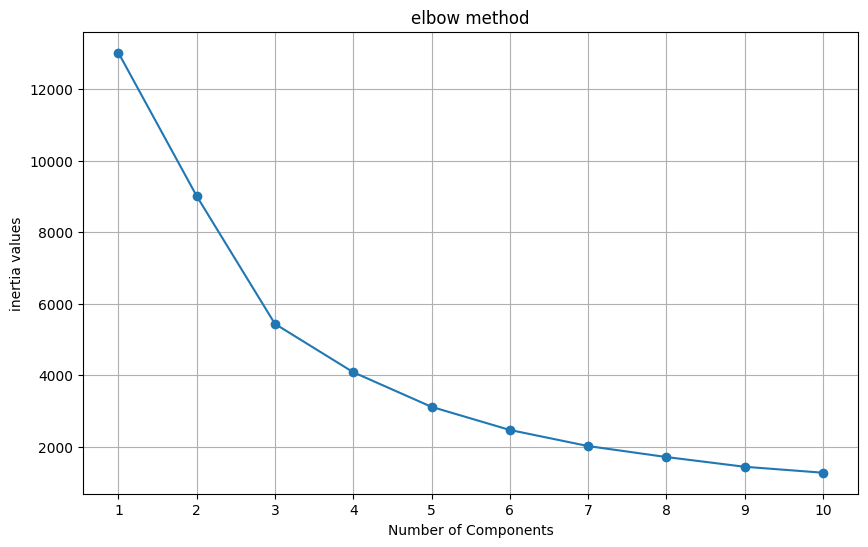

In [33]:
# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('elbow method')
plt.xlabel('Number of Components')
plt.ylabel('inertia values')
plt.xticks(k_range)
plt.grid(True)
plt.show()

we can conclude from elbow method that 3 clusters is the best in the breaking point 

In [34]:
kmeans=KMeans(init="k-means++",n_clusters=3,n_init=50) #fit the data with the best cluster
kmeans.fit(data_normalized)
labels_kmeans = kmeans.fit_predict(data_normalized) # get the labels

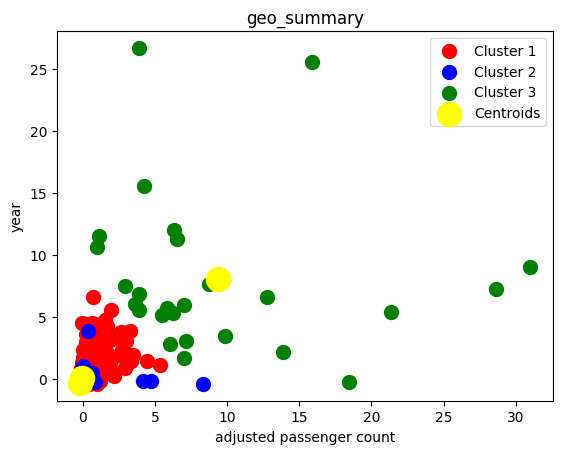

In [35]:
# Visualising the clusters
plt.scatter(data_normalized[labels_kmeans == 0, 0], data_normalized[labels_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_normalized[labels_kmeans == 1, 0], data_normalized[labels_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_normalized[labels_kmeans == 2, 0], data_normalized[labels_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.title('geo_summary')
plt.xlabel('adjusted passenger count')
plt.ylabel('year')
plt.legend()
plt.show()

In [36]:
newdf["cluster labels"] = labels_kmeans+1 # make new column to see each row belong to which cluster
newdf

,CustomerID,Money paid,Number of purchase,days,cluster labels
0,12346.0,77183.60,1,325,2
1,12347.0,4310.00,7,1,1
2,12348.0,1797.24,4,74,1
3,12349.0,1757.55,1,18,1
4,12350.0,334.40,1,309,2
...,...,...,...,...,...
4334,18280.0,180.60,1,277,2
4335,18281.0,80.82,1,180,2
4336,18282.0,178.05,2,7,1
4337,18283.0,2045.53,16,3,1


In [37]:
newdf.drop("CustomerID",axis=1).groupby('cluster labels').describe().T # see properties of each cluster

cluster labels                       1             2              3
Money paid         count   3224.000000   1089.000000      26.000000
                   mean    1861.743711    629.682673   86148.041923
                   std     3065.103355   3003.646553   70920.359150
                   min        6.200000      3.750000   11189.910000
                   25%      408.532500    170.750000   38040.647500
                   50%      917.770000    310.470000   59697.415000
                   75%     2080.235000    541.810000  110673.155000
                   max    50491.810000  77183.600000  281327.780000
Number of purchase count   3224.000000   1089.000000      26.000000
                   mean       4.678350      1.583104      66.500000
                   std        5.151971      1.451017      49.251396
                   min        1.000000      1.000000       2.000000
                   25%        2.000000      1.000000      44.250000
                   50%        3.000000      1.000000      53.000000
                   75%        6.000000      2.000000      83.000000
                   max       55.000000     34.000000     210.000000
days               count   3224.000000   1089.000000      26.000000
                   mean      40.231700    245.417815       5.038462
                   std       35.225491     67.244758       8.599911
                   min        0.000000    137.000000       0.000000
                   25%       11.000000    186.000000       0.000000
                   50%       29.000000    240.000000       2.500000
                   75%       63.000000    297.000000       5.250000
                   max      162.000000    373.000000      38.000000

In [38]:
newdf.drop('cluster labels',axis=1,inplace=True) # drop the cluster column
newdf

,CustomerID,Money paid,Number of purchase,days
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4334,18280.0,180.60,1,277
4335,18281.0,80.82,1,180
4336,18282.0,178.05,2,7
4337,18283.0,2045.53,16,3


# Hierarchical clustering

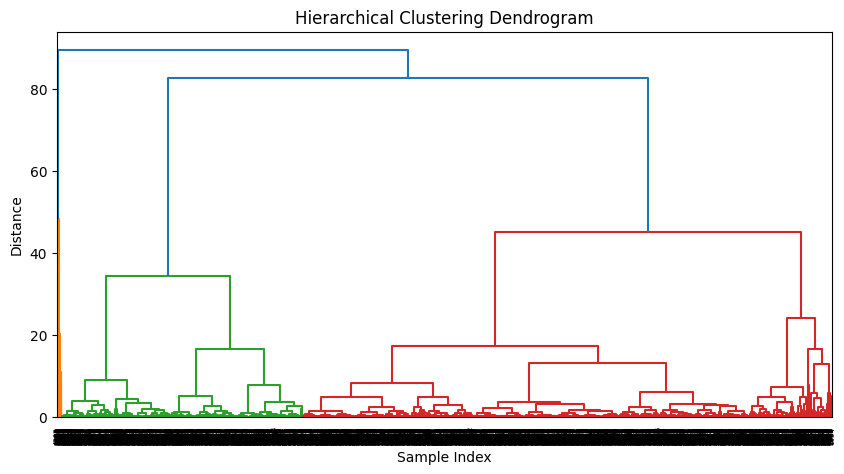

In [39]:
# Perform hierarchical clustering
linkage_type = 'ward'  
linkage_matrix = linkage(data_normalized, method=linkage_type)
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

based on looking in the dendrogram 3 clusters is the best clusters

In [40]:
num_clusters = 3  # Choose the number of clusters based on the dendrogram
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust') # fit the data and get labels

In [41]:
newdf["cluster labels"] = cluster_labels  # make new column to see each row belong to which cluster
newdf

,CustomerID,Money paid,Number of purchase,days,cluster labels
0,12346.0,77183.60,1,325,3
1,12347.0,4310.00,7,1,3
2,12348.0,1797.24,4,74,3
3,12349.0,1757.55,1,18,3
4,12350.0,334.40,1,309,2
...,...,...,...,...,...
4334,18280.0,180.60,1,277,2
4335,18281.0,80.82,1,180,2
4336,18282.0,178.05,2,7,3
4337,18283.0,2045.53,16,3,3


In [42]:
newdf.drop("CustomerID",axis=1).groupby('cluster labels').describe().T # see properties of each cluster

cluster labels                        1            2             3
Money paid         count      26.000000  1350.000000   2963.000000
                   mean    86148.041923   555.377579   2004.126367
                   std     70920.359150   702.300647   3615.518737
                   min     11189.910000     3.750000      6.200000
                   25%     38040.647500   181.312500    415.820000
                   50%     59697.415000   334.735000    962.390000
                   75%    110673.155000   634.845000   2219.815000
                   max    281327.780000  9864.260000  77183.600000
Number of purchase count      26.000000  1350.000000   2963.000000
                   mean       66.500000     1.752593      4.873777
                   std        49.251396     1.278019      5.337963
                   min         2.000000     1.000000      1.000000
                   25%        44.250000     1.000000      2.000000
                   50%        53.000000     1.000000      3.000000
                   75%        83.000000     2.000000      6.000000
                   max       210.000000    12.000000     55.000000
days               count      26.000000  1350.000000   2963.000000
                   mean        5.038462   220.542963     33.491056
                   std         8.599911    78.557345     28.561604
                   min         0.000000    86.000000      0.000000
                   25%         0.000000   154.000000     10.000000
                   50%         2.500000   213.000000     25.000000
                   75%         5.250000   280.000000     52.000000
                   max        38.000000   373.000000    371.000000

In [43]:
newdf.drop("cluster labels",axis=1,inplace=True) # drop the cluster column
newdf

,CustomerID,Money paid,Number of purchase,days
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4334,18280.0,180.60,1,277
4335,18281.0,80.82,1,180
4336,18282.0,178.05,2,7
4337,18283.0,2045.53,16,3
